In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pearsonr

## Covariance

[[16.88888889 22.66666667]
 [22.66666667 60.44444444]]
Var x:  16.88888888888889
Var y:  60.44444444444444


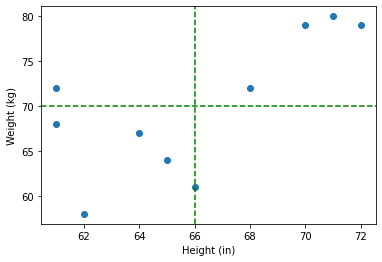

In [41]:
heights = np.array([68, 62, 64, 61, 70, 66, 61, 65, 71, 72])
weights = np.array([72, 58, 67, 72, 79, 61, 68, 64, 80, 79])

plt.scatter(x=heights, y=weights)

plt.axvline(heights.mean(), color="g", linestyle="--")
plt.axhline(weights.mean(), color="g", linestyle="--")

plt.xlabel("Height (in)")
plt.ylabel("Weight (kg)")

x = heights
y = weights

print(np.cov(x, y))

print("Var x: ", x.var(ddof=1))
print("Var y: ", y.var(ddof=1))

-120.06666666666665


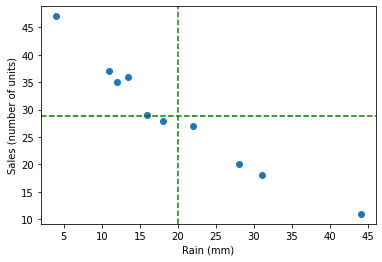

In [25]:
sales = np.array([47, 37, 35, 36, 29, 28, 27, 20, 18, 11])
rain  = np.array([4, 11, 12, 13.5, 16, 18, 22, 28, 31, 44])

plt.scatter(x=rain, y=sales)

plt.axvline(rain.mean(), color="g", linestyle="--")
plt.axhline(sales.mean(), color="g", linestyle="--")

plt.xlabel("Rain (mm)")
plt.ylabel("Sales (number of units)")
print(np.cov(sales, rain)[0, 1])

-20.777777777777775


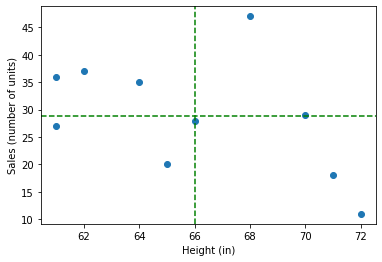

In [26]:
plt.scatter(x=heights, y=sales)

plt.axvline(heights.mean(), color="g", linestyle="--")
plt.axhline(sales.mean(), color="g", linestyle="--")

plt.xlabel("Height (in)")
plt.ylabel("Sales (number of units)")

print(np.cov(heights, sales)[0, 1])

126.66133333333333


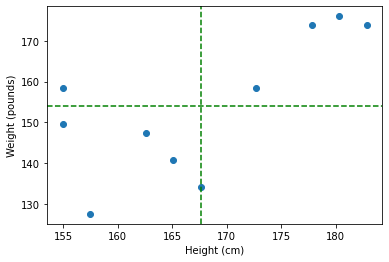

In [27]:
heights = np.array([68, 62, 64, 61, 70, 66, 61, 65, 71, 72])
weights = np.array([72, 58, 67, 72, 79, 61, 68, 64, 80, 79])

heights = heights * 2.54 
weights = weights * 2.2

plt.scatter(x=heights, y=weights)

plt.axvline(heights.mean(), color="g", linestyle="--")
plt.axhline(weights.mean(), color="g", linestyle="--")

plt.xlabel("Height (cm)")
plt.ylabel("Weight (pounds)")

print(np.cov(heights, weights)[0, 1])

In [42]:
## Heights example z-score

h1 = 60
h2 = h1 * 2.54

s1 = 2.5
s2 = s1 * 2.54

m1 = 65
m2 = m1 * 2.54

z1 = (h1 - m1)/s1
z2 = (h2 - m2)/s2

## Pearson vs. Spearman

In [52]:
x = np.array([1, 2, 3, 4, 5])
y = x**9

print("Pearson's correlation,", np.corrcoef(x, y)[0, 1])

Pearson's correlation, 0.7760535744907178


In [53]:
x = np.array([1, 2, 3, 4, 5])
y = x**9

rank_x = range(len(x))
rank_y = range(len(x))

print("Spearman's correlation,", np.corrcoef(rank_x, rank_y)[0, 1])

Spearman's correlation, 0.9999999999999999


### Scaler Problem Solving Example

In [54]:
df_ps = pd.read_csv("problem_solving.csv")
# test1 was before the session, test2 was after

In [55]:
df_ps

,id,test_1,test_2
0,0,40,38
1,1,49,44
2,2,65,69
3,3,59,63
4,4,44,43
...,...,...,...
132,132,45,44
133,133,46,42
134,134,40,35
135,135,60,66


In [56]:
df_ps.describe()

,id,test_1,test_2
count,137.000000,137.000000,137.000000
mean,68.000000,60.489051,62.430657
std,39.692569,17.080311,17.516293
min,0.000000,30.000000,27.000000
25%,34.000000,46.000000,48.000000
50%,68.000000,59.000000,62.000000
75%,102.000000,75.000000,77.000000
max,136.000000,89.000000,96.000000


In [61]:
from scipy.stats import ttest_ind, ttest_rel
ttest_ind(df_ps["test_1"], df_ps["test_2"], alternative="less")

Ttest_indResult(statistic=-0.9288987997838147, pvalue=0.17688256437398803)

In [67]:
#H0: m1 = m2
#H1: m1 < m2
ttest_rel(df_ps["test_1"], df_ps["test_2"], alternative="less")

Ttest_relResult(statistic=-5.502886353508166, pvalue=8.979201768961535e-08)

In [64]:
import scipy
scipy.__version__

'1.7.3'

## How to test the signficance of a correlation

### Aerofit data

In [65]:
df_aerofit = pd.read_csv("aerofit.csv")

In [66]:
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [68]:
numeric_cols = ["Age", "Income", "Miles"]
df_aerofit_numeric = df_aerofit[numeric_cols]

<AxesSubplot:>

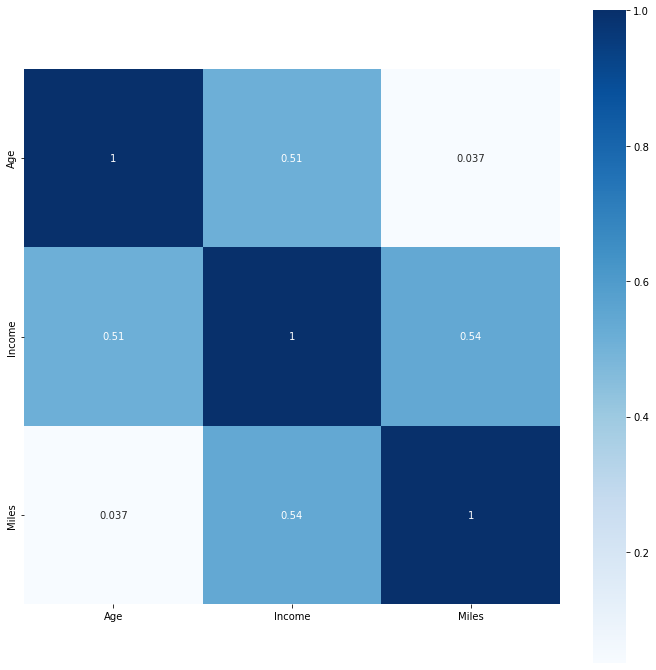

In [69]:
plt.figure(figsize=(12, 12))
sns.heatmap(df_aerofit_numeric.corr(method='pearson'), square=True,annot=True, cmap="Blues")

In [71]:
## H0: Insignificant correlation
## Ha: Significant correlation
from scipy.stats import pearsonr
pearsonr(df_aerofit_numeric["Income"], df_aerofit_numeric["Miles"])

(0.54347325894583, 3.193578264540549e-15)

### Sachin - Balls faced vs. Runs

In [72]:
df = pd.read_csv("Sachin_ODI.csv")

In [73]:
df.head()

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,True,False
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,False,False


<AxesSubplot:>

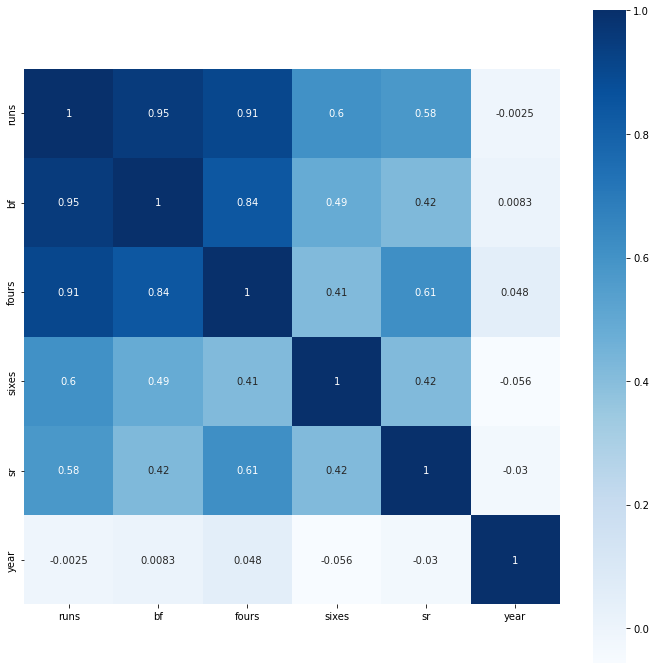

In [74]:
df["year"] = pd.DatetimeIndex(df['Date']).year
numeric_colums = ["runs", "bf", "fours", "sixes", "sr", "year"]
df_numeric = df[numeric_colums]
plt.figure(figsize=(12, 12))
sns.heatmap(df_numeric.corr(method='pearson'), square=True, annot=True, cmap="Blues")

1.20467394572395e-188
Reject null hypothesis


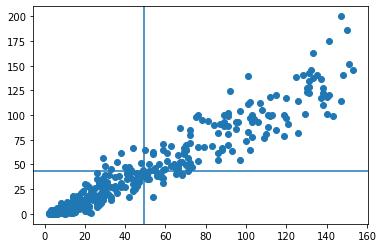

In [75]:
x = df["bf"]
y = df["runs"]
plt.scatter(x, y)
plt.axvline(x.mean())
plt.axhline(y.mean())
# H0: x and y are uncorrelated
corr_stat, p_value = pearsonr(x, y)
print(p_value)
if p_value < 0.05:
    print("Reject null hypothesis")
else:
    print("Uncorrelated")

In [77]:
from scipy.stats import poisson, binom
1 - poisson.cdf(2127, mu=2000)

0.0023628451264066097

In [78]:
1 - binom.cdf(71, n=500, p=0.1)

0.0011438142380757466